In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 109.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11



image 1/1 /content/sample.jpg: 384x640 2 persons, 1 tie, 326.8ms
Speed: 8.6ms preprocess, 326.8ms inference, 36.4ms postprocess per image at shape (1, 3, 384, 640)


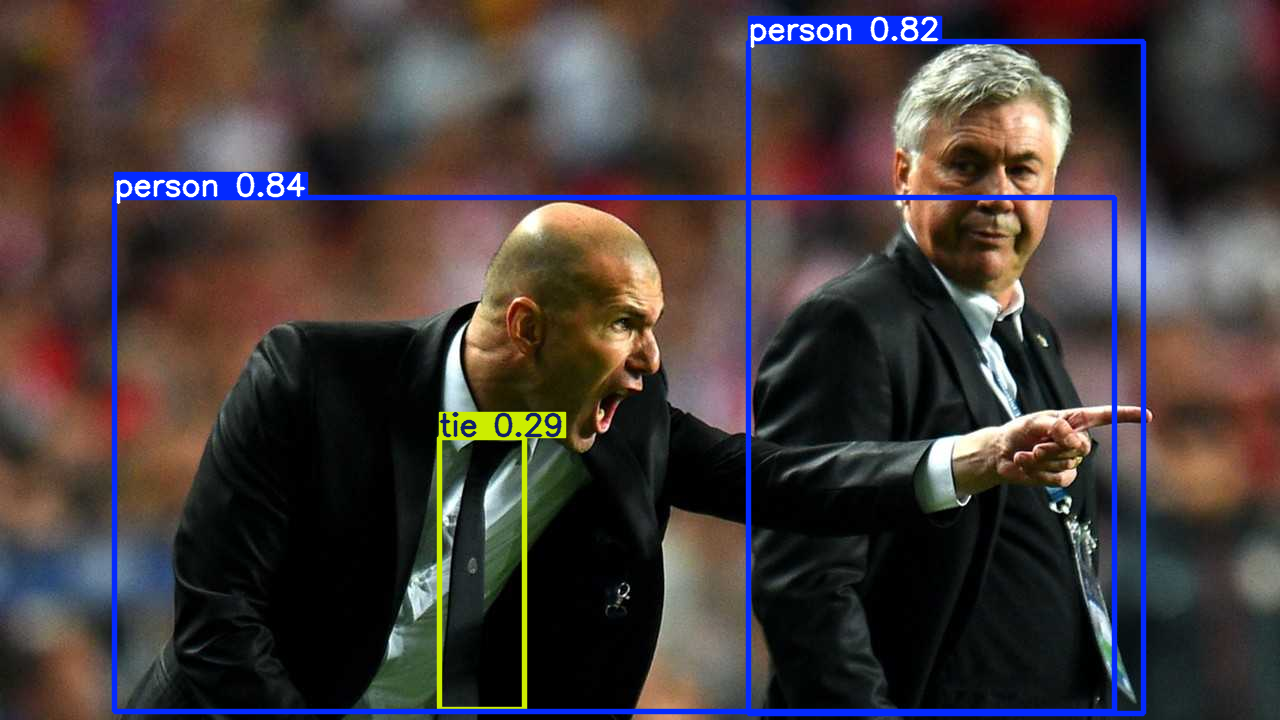

In [3]:
from ultralytics import YOLO

# Load pretrained model (YOLOv8n for fast experimentation)
model = YOLO('yolov8n.pt')

# Test with a sample image
results = model('sample.jpg')
results[0].show()  # updated fix: access result list element


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6plXXWjqcqmkMVJnbM2i")
project = rf.workspace("pensdatasetobjectdetection").project("pens-and-cups-detection-lsrax")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pens-and-cups-detection-1 in yolov8:: 100%|██████████| 176/176 [00:00<00:00, 4324.33it/s]


In [5]:
# Train YOLOv8 model on Roboflow dataset
!yolo detect train data={dataset.location}/data.yaml model=yolov8n.pt epochs=50 imgsz=640 batch=16


Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/pens-and-cups-detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

In [6]:
!yolo detect val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 662.6±307.7 MB/s, size: 66.6 KB)
val: Scanning /content/pens-and-cups-detection-1/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 17/17 193.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 0.4it/s 5.6s
                   all         17         20      0.921      0.917      0.929      0.628
                   cup          9         12       0.89      0.833      0.862      0.467
                   pen          8          8      0.952          1      0.995      0.788
Speed: 6.5ms preprocess, 284.0ms inference, 0.0ms loss, 22.7ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
